In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
conv = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/Stat_2/conversion.csv')

In [3]:
conv.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


In [4]:
conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
conv.xyz_campaign_id.nunique()

3

In [19]:
conv_fb = conv.groupby(['fb_campaign_id']).Impressions.sum()

In [20]:
conv_fb.head(3)

fb_campaign_id
103916     7350
103917    17861
103920      693
Name: Impressions, dtype: int64

In [26]:
conv_fb = np.log(conv_fb)

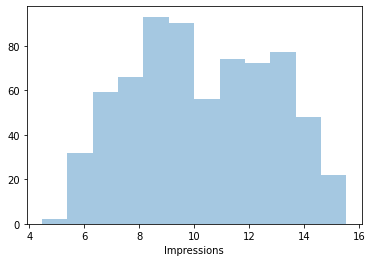

In [27]:
x = sns.distplot(conv_fb, kde = False)

In [31]:
conv['CTR'] = conv['Clicks'] / conv['Impressions']

In [65]:
conv.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000


In [50]:
conv.CTR.idxmax()

150

In [53]:
conv.iloc[150]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
CTR                    0.00105932
Name: 150, dtype: object

In [54]:
conv.query('CTR >= 150')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR


In [84]:
conv_xyz = conv.query("xyz_campaign_id == '916'").CTR

In [85]:
conv_xyz.head(3)

0    0.000136
1    0.000112
2    0.000000
Name: CTR, dtype: float64

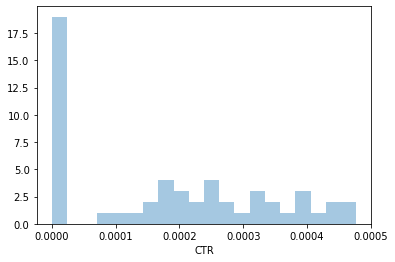

In [86]:
y = sns.distplot(conv_xyz, kde=False, bins=20)

In [116]:
conv['CPC'] = conv['Spent'] / conv['Clicks']

In [121]:
conv.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


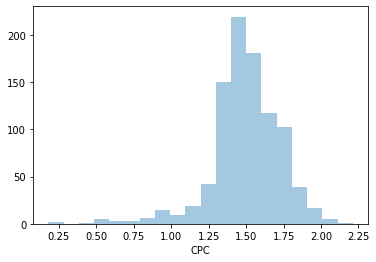

In [122]:
z = sns.distplot(conv.CPC, kde=False, bins=20)

In [125]:
conv_M = conv.query("gender == 'M'").CPC.dropna()

In [126]:
conv_F = conv.query("gender == 'F'").CPC.dropna()

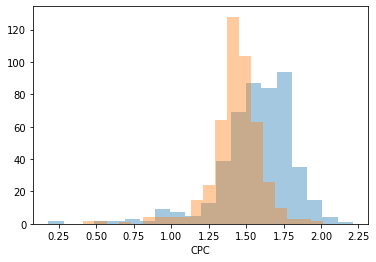

In [127]:
sns.distplot(conv_M, kde=False, bins=20)
sns.distplot(conv_F, kde=False, bins=20)

In [138]:
conv['CR'] = conv['Approved_Conversion'] / conv['Clicks'] * 100

In [139]:
conv.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN


In [141]:
conv.query("ad_id == '1121814'").CR.round(2)

860    3.09
Name: CR, dtype: float64